In [3]:
# import necessary libraries.

import numpy as np
import nltk # natural language toolkit
import scipy.stats as ss
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re # regular expression for doing matching operations
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [4]:
# download gutenberg corpus from nltk.

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [5]:
nltk.corpus.gutenberg.fileids()
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', ...]
Emma = nltk.corpus.gutenberg.words('austen-sense.txt')

Emma

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...]

In [6]:
words = list(map(str.lower, Emma))
set_of_words = set(words)
words_counts = [(w, words.count(w)) for w in set_of_words]

words_counts[:15]

[('write', 16),
 ('answering', 2),
 ('accrue', 1),
 ('resolved', 28),
 ('arrives', 1),
 ('enquire', 6),
 ('cant', 1),
 ('calmly', 8),
 ('irritates', 1),
 ('counter', 1),
 ('checked', 5),
 ('resolution', 26),
 ('uniform', 1),
 ('commonly', 1),
 ('likewise', 26)]

In [7]:
ranks = ss.rankdata([c for (w, c) in words_counts])
marged_ranks = [(c[0], c[1], w) for c, w in zip(words_counts, ranks)] # merging in all 3 lists

marged_ranks[:15]

[('write', 16, 5594.0),
 ('answering', 2, 2937.0),
 ('accrue', 1, 1234.5),
 ('resolved', 28, 5881.5),
 ('arrives', 1, 1234.5),
 ('enquire', 6, 4698.5),
 ('cant', 1, 1234.5),
 ('calmly', 8, 5019.0),
 ('irritates', 1, 1234.5),
 ('counter', 1, 1234.5),
 ('checked', 5, 4467.5),
 ('resolution', 26, 5844.0),
 ('uniform', 1, 1234.5),
 ('commonly', 1, 1234.5),
 ('likewise', 26, 5844.0)]

In [8]:
sorted_ranks = sorted(marged_ranks, key=lambda rank: rank[2]) # sorting by rank

sorted_ranks[-15:] # last 15 elements in the list

[(';', 1419, 6389.0),
 ('"', 1506, 6390.0),
 ('she', 1613, 6391.0),
 ('it', 1757, 6392.0),
 ('was', 1861, 6393.0),
 ('in', 1979, 6394.0),
 ('i', 2004, 6395.0),
 ('a', 2092, 6396.0),
 ('her', 2551, 6397.0),
 ('and', 3491, 6398.0),
 ('of', 3572, 6399.0),
 ('.', 3975, 6400.0),
 ('the', 4105, 6401.0),
 ('to', 4116, 6402.0),
 (',', 9397, 6403.0)]

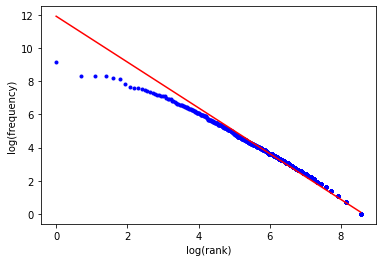

In [9]:
Length = len(sorted_ranks)

X = np.array([np.log(Length - r + 1) for (_, __, r) in sorted_ranks])
Y = np.array([np.log(c) for (_, c, __) in sorted_ranks])

plt.plot(X, Y, 'b.')
A = np.vstack([X, np.ones(Length)]).T
m, c = np.linalg.lstsq(A, Y, rcond = None)[0]
plt.plot(X, m*X + c, 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

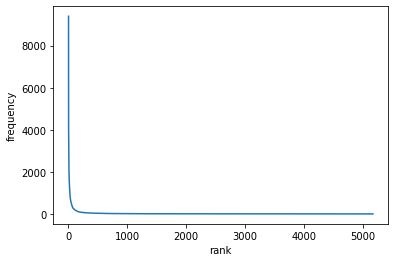

In [10]:
plt.plot([Length - r + 1 for (_, __, r) in sorted_ranks], [c for (_, c, __) in sorted_ranks])
plt.xlabel('rank')
plt.ylabel('frequency')
plt.show()

[(0, ('accrue', 1)),
 (1, ('arrives', 1)),
 (2, ('cant', 1)),
 (3, ('irritates', 1)),
 (4, ('counter', 1)),
 (5, ('uniform', 1)),
 (6, ('commonly', 1)),
 (7, ('parlors', 1)),
 (8, ('hop', 1)),
 (9, ('habitual', 1)),
 (10, ('joys', 1)),
 (11, ('supplanted', 1)),
 (12, ('virtuous', 1)),
 (13, ('unusually', 1)),
 (14, ('claimed', 1))]

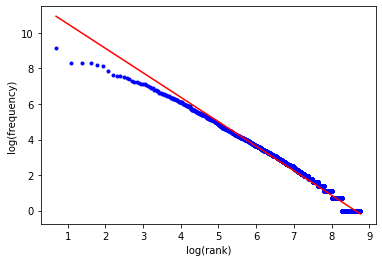

In [11]:
sorted_ranks2 = sorted(words_counts, key=lambda freq : freq[1])
# print(sorted_ranks2[:20])

ranks_with_counts = list(enumerate(sorted_ranks2))

Length2 = len(sorted_ranks2)
X2 = np.array([np.log(Length - r + 1) for (r, (w, c)) in ranks_with_counts])
Y2 = np.array([np.log(c) for (_, (__, c)) in ranks_with_counts])
plt.plot(X2, Y2, 'b.')
# plt.show()

A2 = np.vstack([X2, np.ones(Length2)]).T
m2, c2 = np.linalg.lstsq(A2, Y2, rcond=None)[0]
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(X2, m2*X2 + c2, 'r')

# np.shape(A2), np.shape(Y2)
# plt.show()

ranks_with_counts[:15]

In [12]:
frequency_dictionary = {}
for w, c in words_counts:
  frequency_dictionary[w] = c

# print(frequency_dictionary)

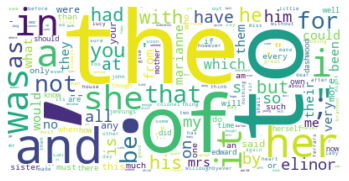

In [13]:
wc = WordCloud(background_color="white")

wc.generate_from_frequencies(frequency_dictionary)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

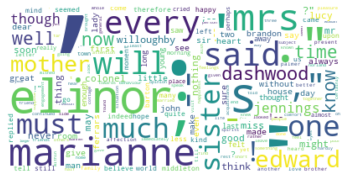

In [14]:
# previous wordcloud is just stopwords since they're the most used words

stopwords = set(STOPWORDS)
frequency_dictionary2 = {}
for w, c in words_counts:
  if w not in stopwords:
    frequency_dictionary2[w] = c

wc.generate_from_frequencies(frequency_dictionary2)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# function to remove unwanted characters from a line using regular expression library.

#the expression will only match alphanumeric characters and blank spaces.

def remove_symbols(line):
    return re.sub('[^A-Za-z0-9\s]+', '', line).lower()

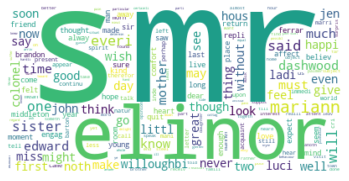

In [18]:
stopwords = set(STOPWORDS)
frequency_dictionary2 = {}
for w, c in words_counts:
  if w not in stopwords:
    w = remove_symbols(w)
    if w:
      # print(w, porter.stem(w))
      w = porter.stem(w)
      frequency_dictionary2[w] = frequency_dictionary2.get(w, 0) + c

wc.generate_from_frequencies(frequency_dictionary2)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()